<a href="https://colab.research.google.com/github/raz0208/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRODIGY_DS_04

### Twitter Sentiment Analysis

## Project Overview

This project performs sentiment analysis on Twitter data to understand public opinion and attitudes towards specific topics or brands. The dataset includes Twitter messages labeled with sentiment categories: Positive, Negative, Neutral, and Irrelevant. The task is to analyze and visualize sentiment patterns for various topics.

Dataset source link: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [55]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [56]:
# Ignore the warnings may shown

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
# Read dataset from source

# Creates a list named cols which holds the names of the columns to assign to the data when reading the CSV file.
columns=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv(r"/content/twitter_training.csv",names=columns)

In [58]:
# Illustrate the first rows of dataset
train.head(10)

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [59]:
# Show the demention of the dataset (Number of rows and columns)
train.shape

(74682, 4)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [61]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [62]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)


Checking for null_values and missing values in the dataset.

In [63]:
train.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,686


In [64]:
train.dropna(inplace=True)
train.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,0


In [65]:
# Checking for duplicate values
train.duplicated().sum()

2340

In [66]:
# Drop duplicate values
train.drop_duplicates(inplace=True)
train.duplicated().sum()

0

### EDA:


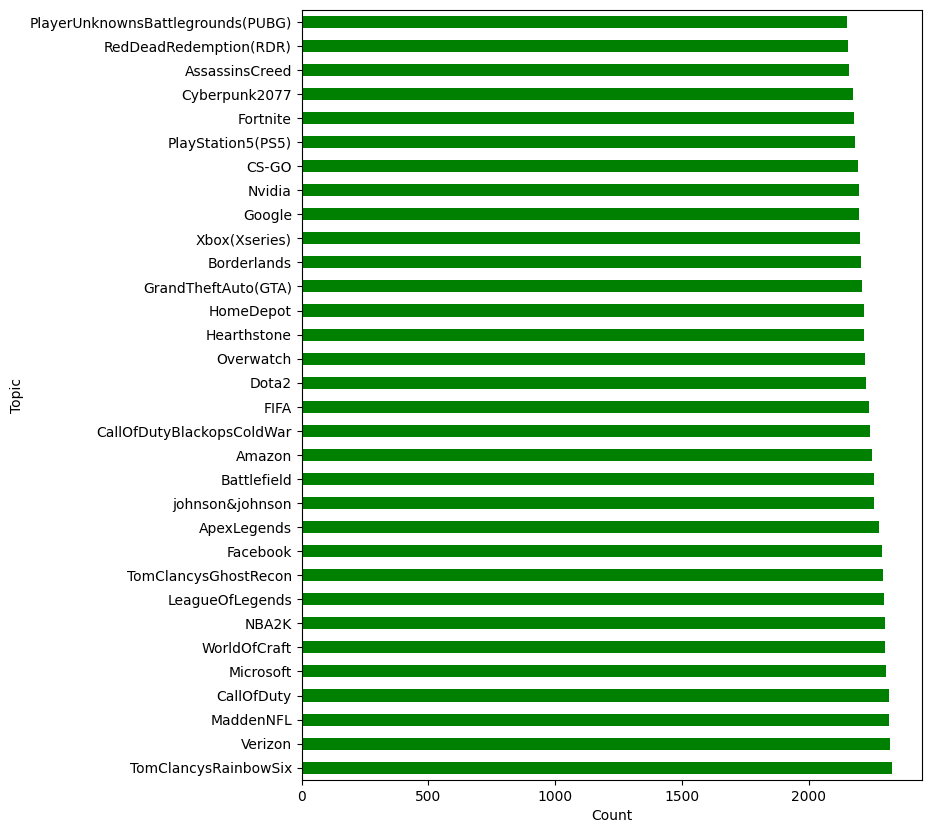

In [67]:
# Visualization of count of different topics
plt.figure(figsize=(8,10))
train['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

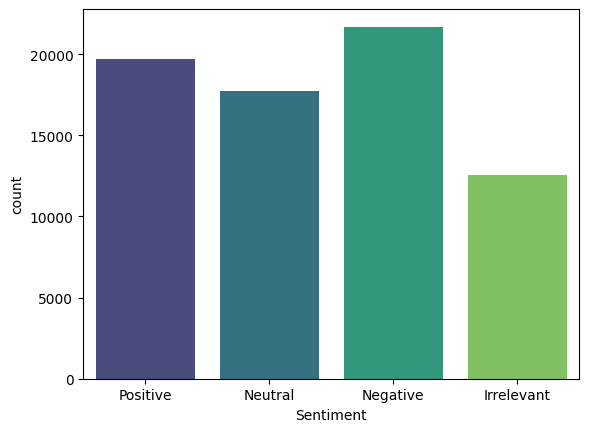

In [68]:
#  Sentiment Distribution
sns.countplot(x = 'Sentiment',data=train,palette='viridis')
plt.show()

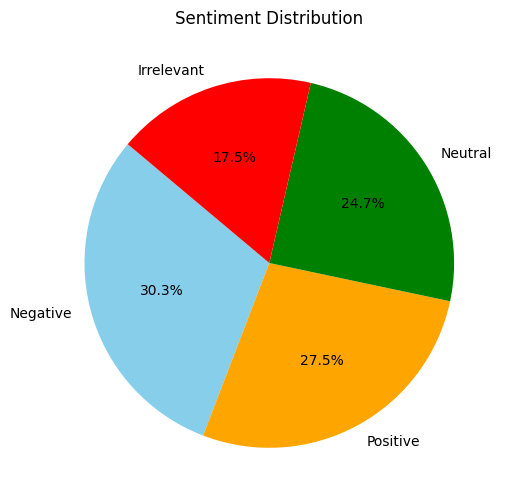

In [69]:
# Calculate the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()



### Observation:

As we can see from the above plots most topic has negative sentiment.



In [70]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


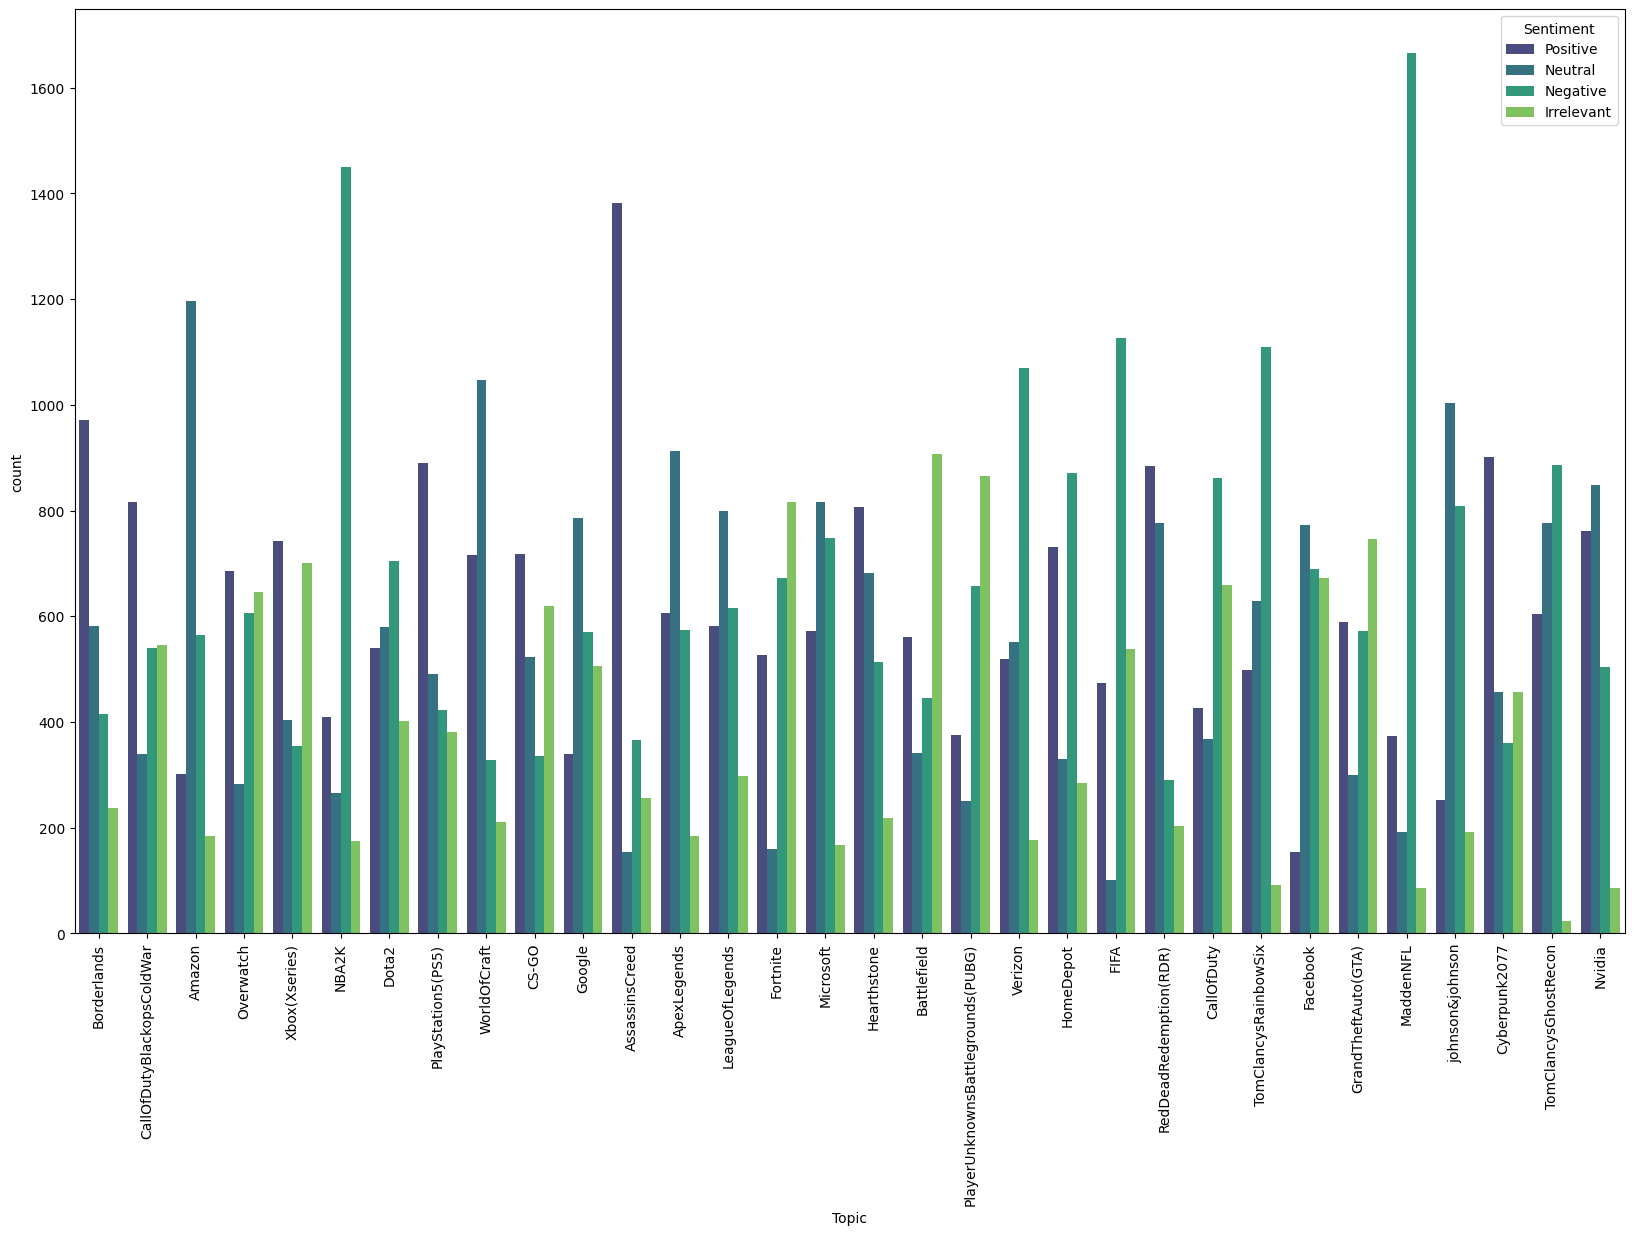

In [71]:
# Sentiment Distribution Topic-wise
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [72]:
# Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')
topic_wise_sentiment

,Topic,Sentiment,Count
0,Amazon,Irrelevant,185
1,Amazon,Negative,565
2,Amazon,Neutral,1197
3,Amazon,Positive,302
4,ApexLegends,Irrelevant,185
...,...,...,...
123,Xbox(Xseries),Positive,743
124,johnson&johnson,Irrelevant,192
125,johnson&johnson,Negative,809
126,johnson&johnson,Neutral,1004


In [73]:
# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]
top_topics_sentiment

,Topic,Sentiment,Count
24,CallOfDuty,Irrelevant,660
25,CallOfDuty,Negative,861
26,CallOfDuty,Neutral,367
27,CallOfDuty,Positive,426
72,MaddenNFL,Irrelevant,86
73,MaddenNFL,Negative,1665
74,MaddenNFL,Neutral,191
75,MaddenNFL,Positive,373
76,Microsoft,Irrelevant,167
77,Microsoft,Negative,748


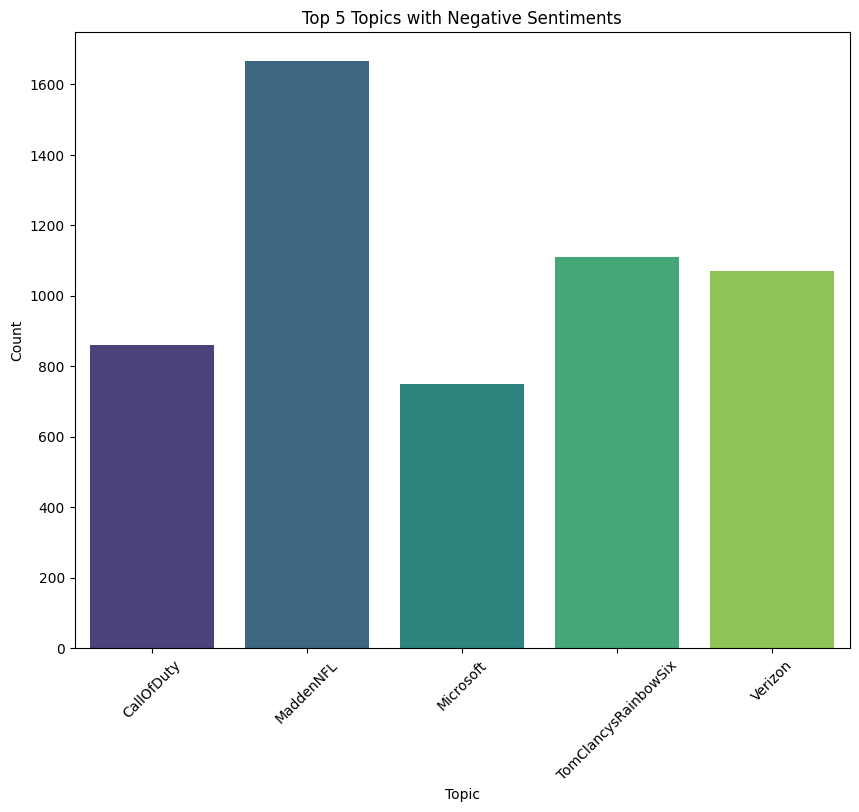

In [74]:
# visualize Top 5 Topics with Negative Sentiments
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

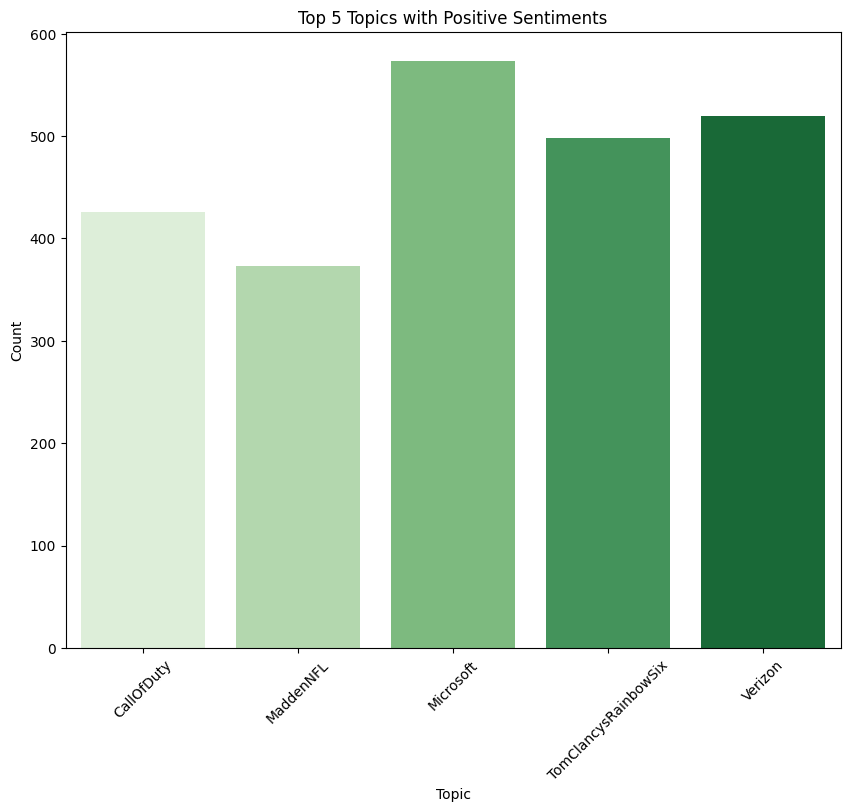

In [75]:
# Top 5 Topics with Positive Sentiments
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

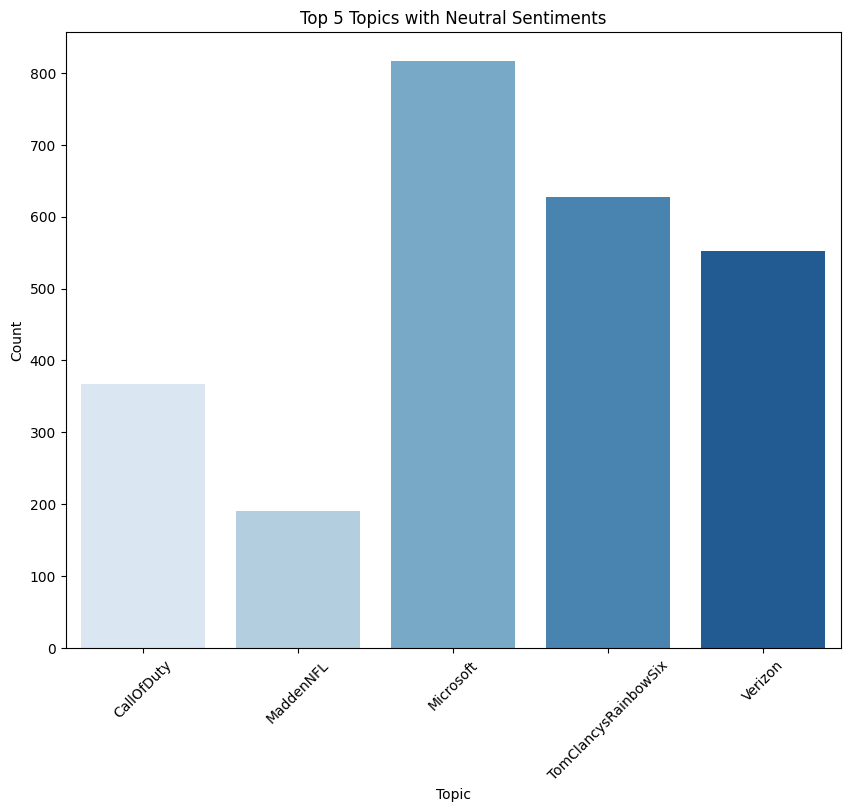

In [76]:
# Top 5 Topics with Neutral Sentiments
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

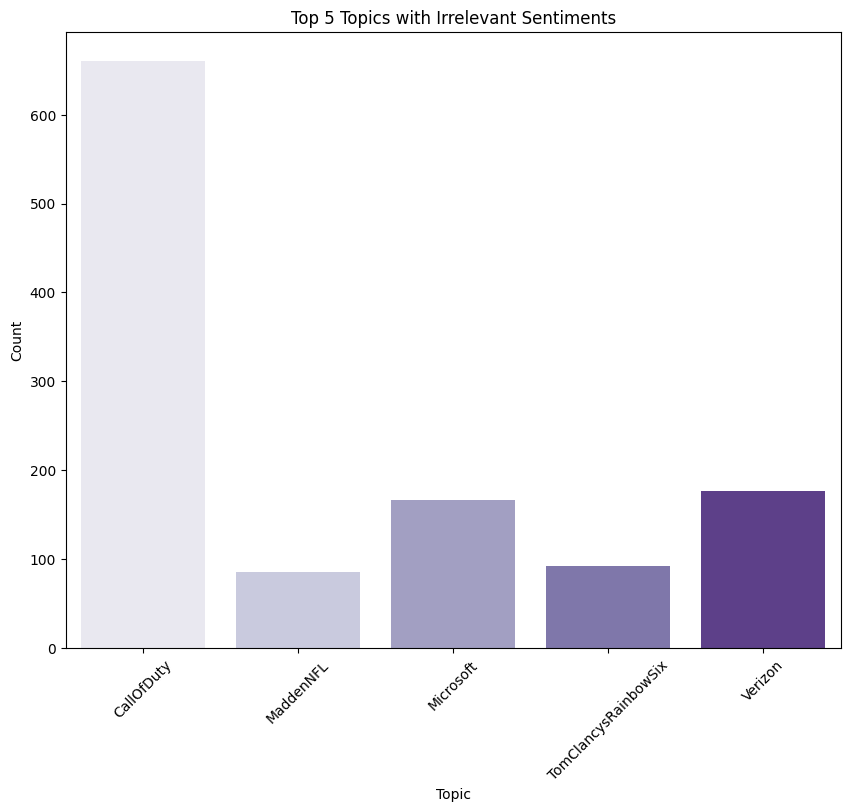

In [77]:
# Top 5 Topics with Irrelevant Sentiments
plt.figure(figsize=(10, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Sentiment Distribution in Google

# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
Google_sentiment_counts = google_data['Sentiment'].value_counts()
Google_sentiment_counts

,count
Sentiment,
Neutral,785
Negative,570
Irrelevant,505
Positive,339


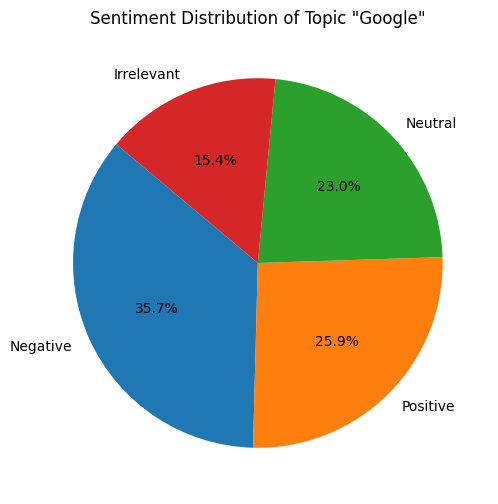

In [84]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(Google_sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

In [80]:
# Sentiment Distribution in Microsoft

# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
MS_sentiment_counts = ms_data['Sentiment'].value_counts()

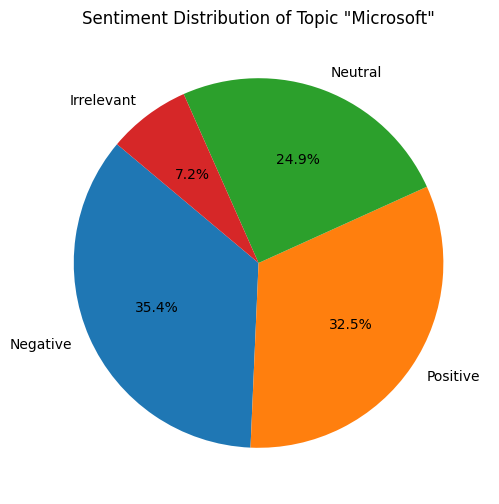

In [83]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(MS_sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [82]:
train['msg_len'] = train['Text'].apply(len)

In [85]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


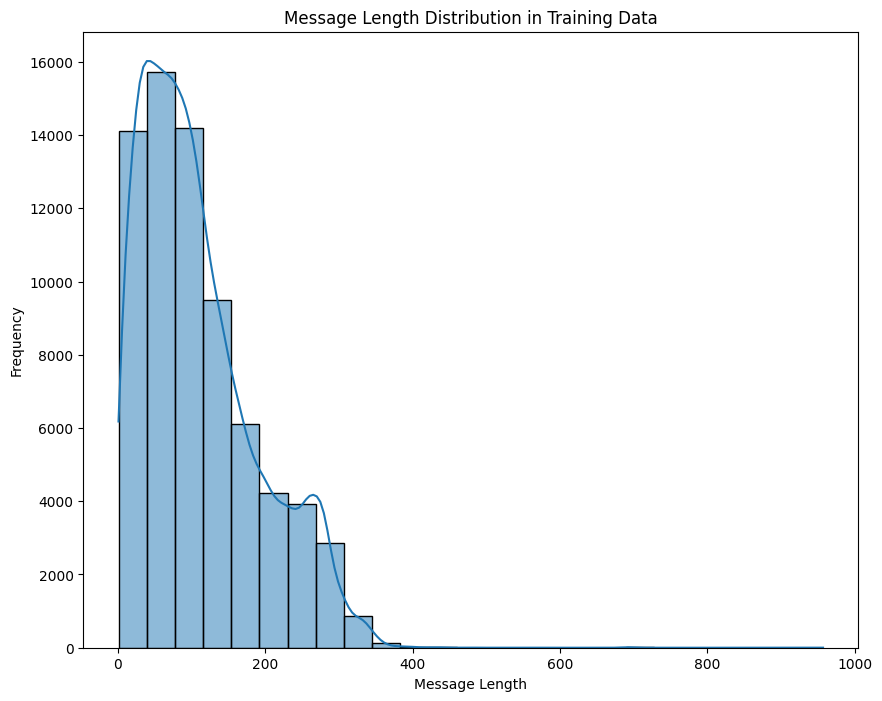

In [91]:
# Plot of message length distribution for training data
plt.figure(figsize=(10, 8))
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

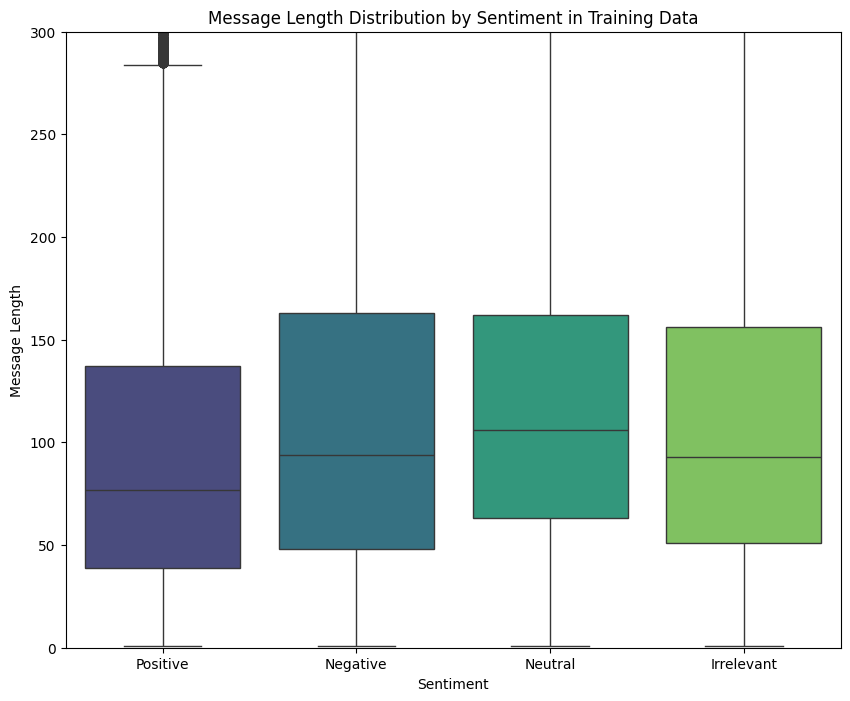

In [94]:
# Plot message length distribution by sentiment for training data
plt.figure(figsize=(10, 8))
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

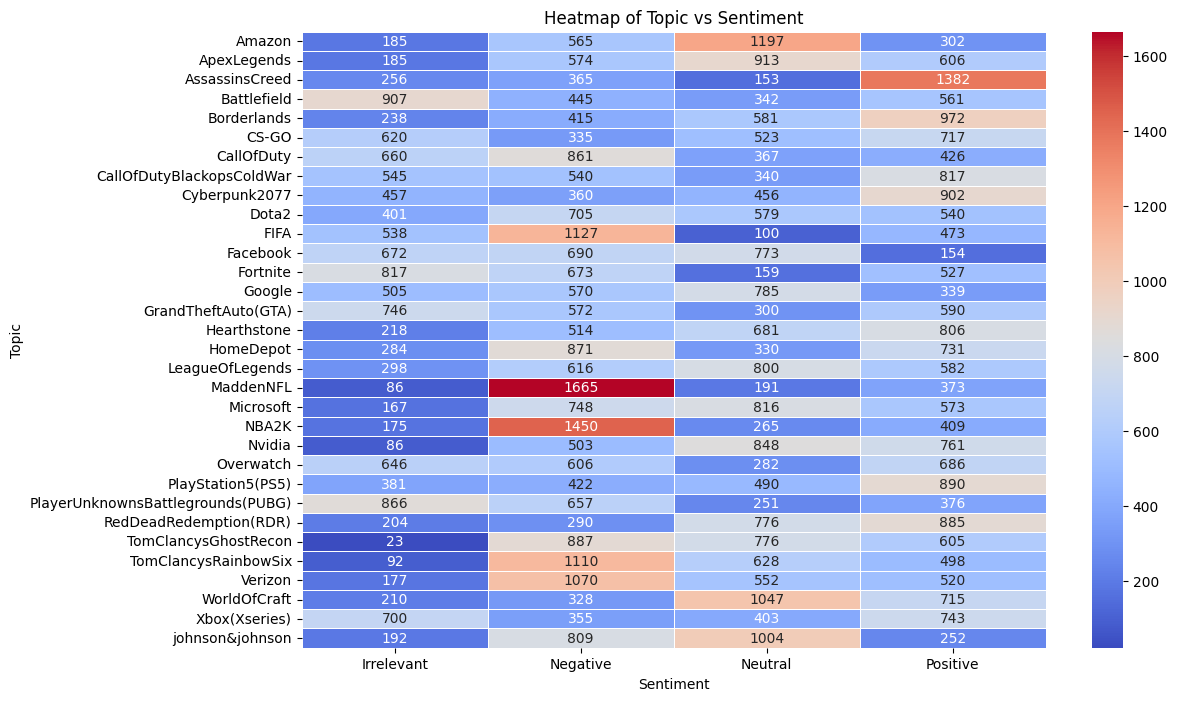

In [95]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

**Conclution:**

- **Most Discussed Topic**: "TomClancyRainbowSix" stands out as the most frequently mentioned topic in the analyzed Twitter data, indicating a high level of engagement or interest within the Twitter community around this subject.

- **Sentiment Breakdown**: The sentiment analysis shows that negative sentiment is the most common, making up 30.3% of the total. Positive sentiment follows at 27.5%, with neutral sentiment closely behind at 24.7%. Irrelevant sentiments make up 17.5%, showing a notable, though smaller, presence.

- **Sentiments for Specific Topics**: Topics like "Google" and "Microsoft" predominantly display neutral sentiment, suggesting that discussions about these tech companies tend to be more balanced or neutral in tone.

- **Message Length**: A key observation is that most tweets are less than 400 words long, indicating that Twitter users generally express their thoughts concisely within the platform’s character limitations.

In conclusion, the sentiment analysis offers meaningful insights into public attitudes on various topics, showing a higher prevalence of negative sentiments but also reflecting a broad spectrum of opinions.